In [ ]:
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.env_checker import check_env
from meta.custom_env import CustomEnv
from utils.fetch_data import fetch_data

data = fetch_data('BTC-USD', '2018-01-01', '2023-01-01')

env = CustomEnv(data, action_spece=3, observation_space=5)
check_env(env)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000, log_interval=1000)

[*********************100%***********************]  1 of 1 completed


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1.82e+03  |
|    ep_rew_mean        | 192       |
| time/                 |           |
|    fps                | 319       |
|    iterations         | 1000      |
|    time_elapsed       | 15        |
|    total_timesteps    | 5000      |
| train/                |           |
|    entropy_loss       | -0.00426  |
|    explained_variance | nan       |
|    learning_rate      | 0.0007    |
|    n_updates          | 999       |
|    policy_loss        | -1.69e-10 |
|    value_loss         | 0         |
-------------------------------------
-------------------------------------
| rollout/              |           |
|    ep_len_mean        | 1.82e+03  |
|    ep_rew_mean        | 186       |
| time/                 |           |
|    fps                | 366       |
|    iterations         | 2000  

[*********************100%***********************]  1 of 1 completed


Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Amount: 0
Step: 1450, Last Action: 1, Reward: 0.1, Total Reward: 144.99999999999605, Balance Before: 0, Balance: 10000, Token Am

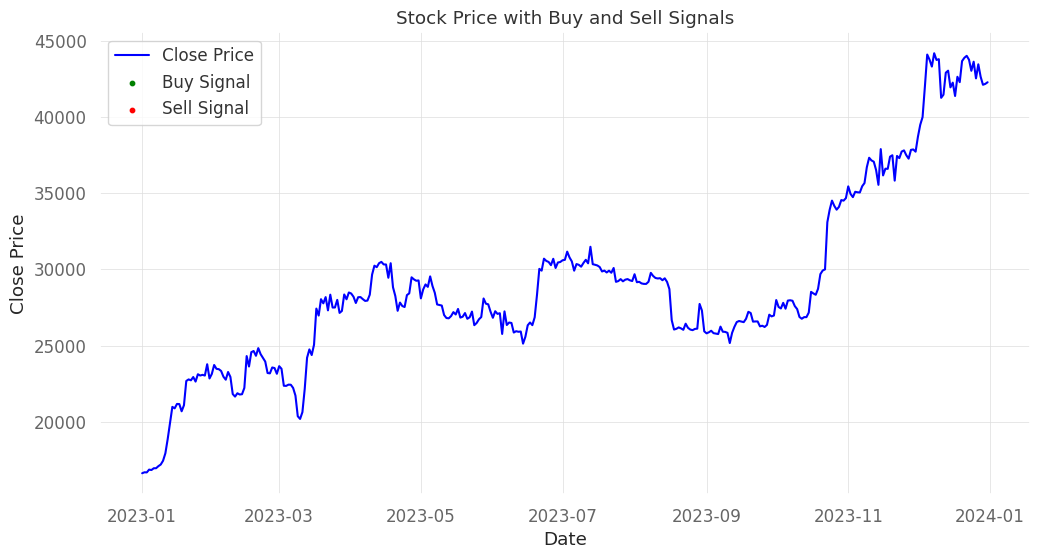

                    Strategy
------------------  ----------
Start Period        2023-01-01
End Period          2023-12-30
Risk-Free Rate      0.0%
Time in Market      0.0%

Cumulative Return   0.0%
CAGR﹪              0.0%

Sharpe              -
Prob. Sharpe Ratio  -
Sortino             -
Sortino/√2          -
Omega               -

Max Drawdown        %
Longest DD Days     -

Gain/Pain Ratio     -
Gain/Pain (1M)      -

Payoff Ratio        -
Profit Factor       -
Common Sense Ratio  -
CPC Index           -
Tail Ratio          -
Outlier Win Ratio   -
Outlier Loss Ratio  -

MTD                 0.0%
3M                  0.0%
6M                  0.0%
YTD                 0.0%
1Y                  0.0%
3Y (ann.)           0.0%
5Y (ann.)           0.0%
10Y (ann.)          0.0%
All-time (ann.)     0.0%

Recovery Factor     -
Ulcer Index         0.0
Serenity Index      -
Avg. Drawdown Days  -


/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2285: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2286: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


/home/tejks/data/master/visoft/RL/venv/lib/python3.12/site-packages/quantstats/stats.py:294: RuntimeWarning: invalid value encountered in scalar divide
  res = returns.mean() / divisor
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


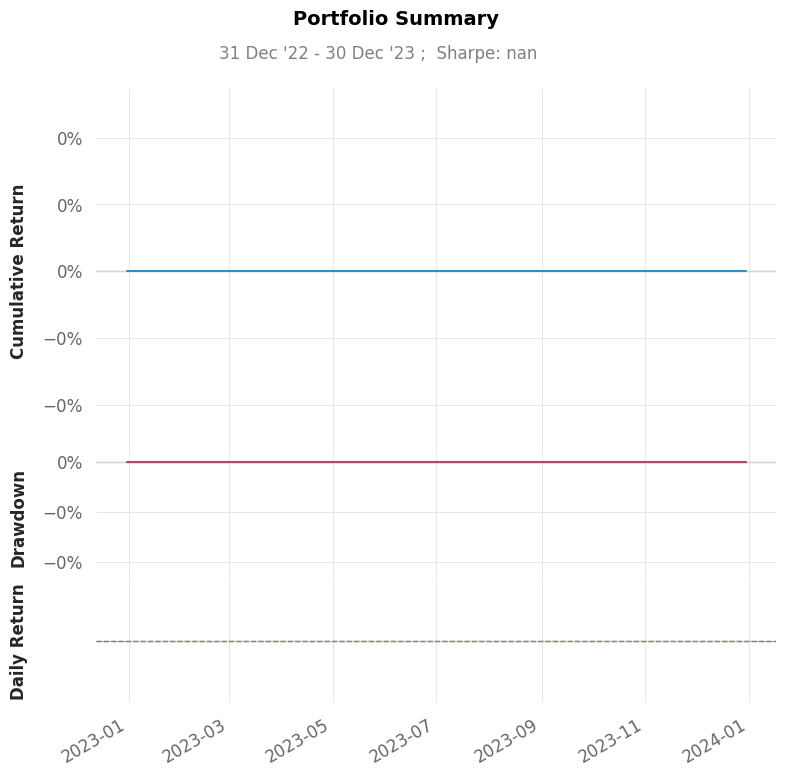

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


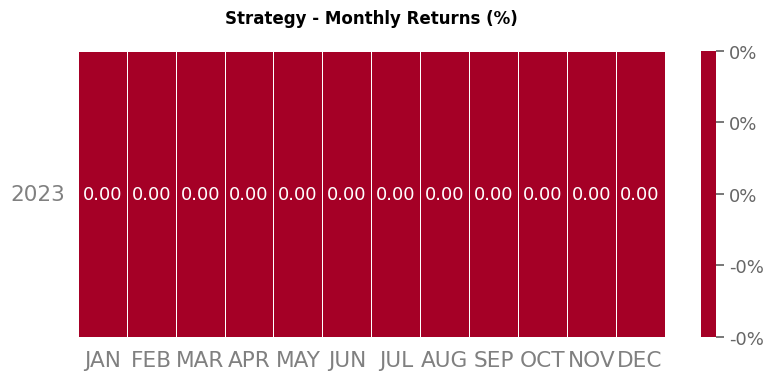

In [ ]:
import pandas as pd
import quantstats as qs
from utils.plot_buy_and_sell import plot_buy_and_sell

test_data = fetch_data('BTC-USD', '2023-01-01', '2024-01-01')

test_env = CustomEnv(test_data, action_spece=3, observation_space=5)
check_env(test_env)

portfolio_values = []

observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    # env.render()
    portfolio_values.append(info['portolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.index)

plot_buy_and_sell(actions_data)

dates = pd.date_range(start=test_data.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)